In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [7]:
data = pd.read_csv('Downloads/abalone.data')

In [8]:
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null object
Length            4176 non-null float64
Diameter          4176 non-null float64
Height            4176 non-null float64
Whole weight      4176 non-null float64
Shucked weight    4176 non-null float64
Viscera weight    4176 non-null float64
Shell weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.7+ KB


In [10]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

In [11]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [12]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,11.432471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,30.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58fcb3b9b0>,
      dtype=object)

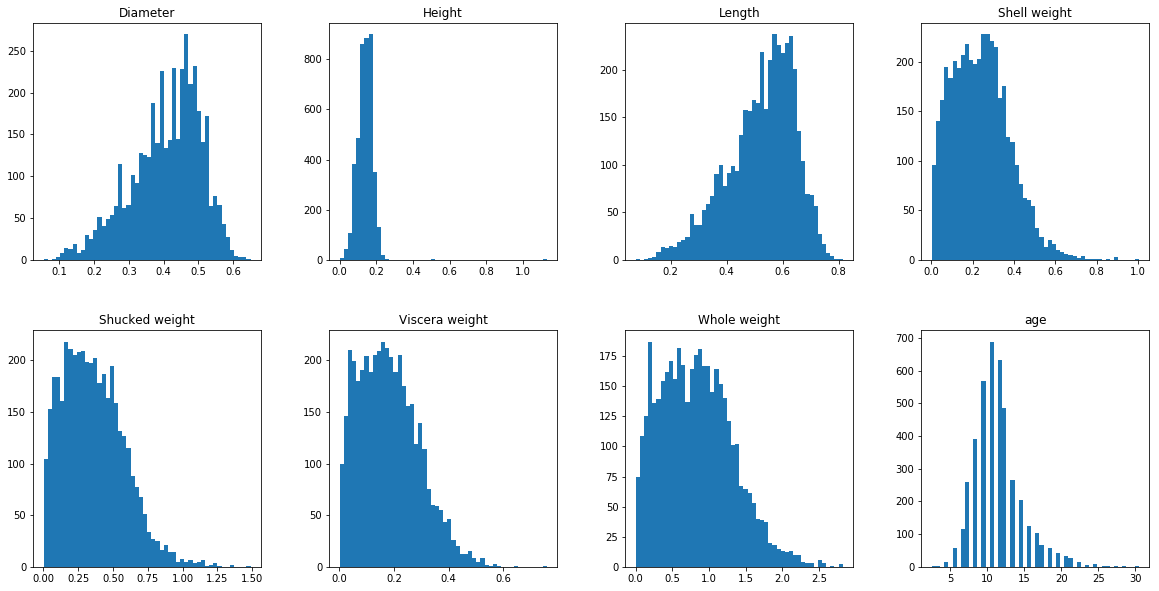

In [13]:
data.hist(figsize=(20,10),grid=False,layout=(2,4),bins=50)

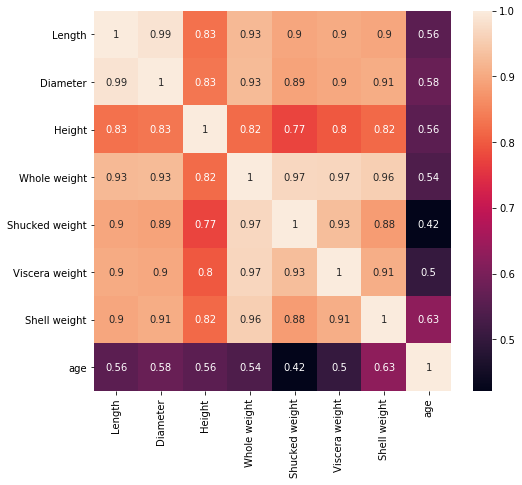

In [14]:
ab_corr = data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(ab_corr,annot=True)

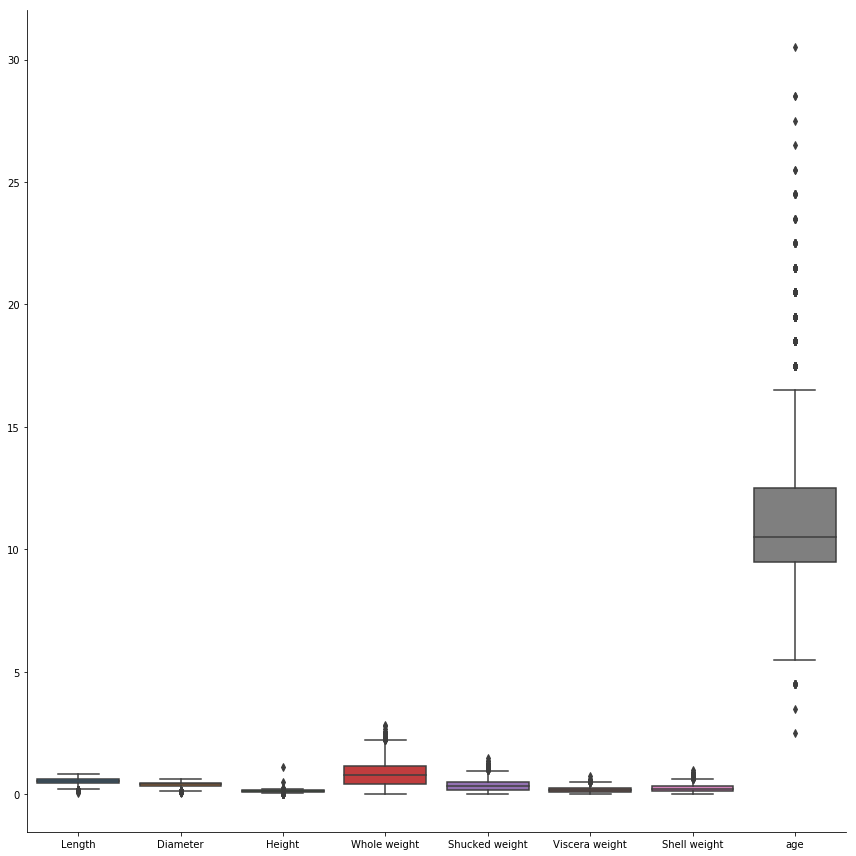

In [15]:
sns.catplot(data=data, kind="box",height=12);

In [16]:
le = LabelEncoder()

In [17]:
data['Sex'] = le.fit_transform(data['Sex'])

In [18]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null int64
Length            4176 non-null float64
Diameter          4176 non-null float64
Height            4176 non-null float64
Whole weight      4176 non-null float64
Shucked weight    4176 non-null float64
Viscera weight    4176 non-null float64
Shell weight      4176 non-null float64
age               4176 non-null float64
dtypes: float64(8), int64(1)
memory usage: 293.7 KB


In [48]:
scaler = StandardScaler()
scaler.fit(data)

/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5


In [23]:
X = data.iloc[:,:-1]

In [24]:
X.shape

(4176, 8)

In [25]:
y = data.iloc[:,-1]

In [26]:
y.shape

(4176,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

In [28]:
def models(modelName):
    m = modl[modelName]()
    m.fit(X_train, y_train)
    print("Model Name  :",modelName)
    print(m.score(X_test, y_test))
    print(mean_squared_error(y_test, m.predict(X_test)))
    print(r2_score(y_test, m.predict(X_test)))
    print("_________________________________________________")

In [29]:
modl = {
    'LinearRegression':LinearRegression,
    'Ridge':Ridge,
    'Lasso':Lasso,
    'GradientBoostingRegressor':GradientBoostingRegressor
        }

In [30]:
for key in modl:
    models(key)

Model Name  : LinearRegression
0.5793096606118944
5.064239577948699
0.5793096606118944
_________________________________________________
Model Name  : Ridge
0.5709018608494699
5.1654520573754175
0.5709018608494699
_________________________________________________
Model Name  : Lasso
-0.0009247158307339464
12.049058620718053
-0.0009247158307339465
_________________________________________________
Model Name  : GradientBoostingRegressor
0.6072017236582425
4.728476960258433
0.6072017236582425
_________________________________________________


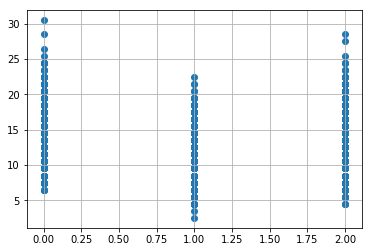

In [31]:

plt.scatter(x = data['Sex'], y = data['age'],)
            
plt.grid(True)

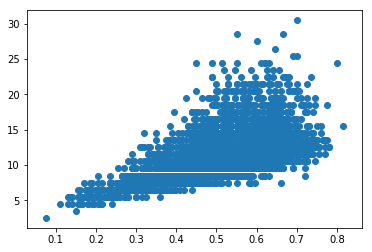

In [32]:
plt.scatter(x = data['Length'],y = data['age'],)


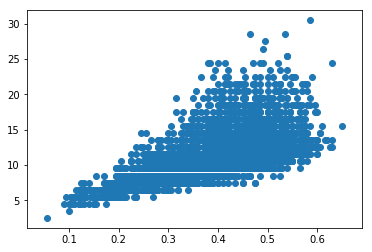

In [33]:
plt.scatter(x = data['Diameter'],y = data['age'],)


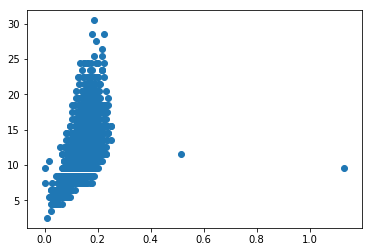

In [34]:
plt.scatter(x = data['Height'],y = data['age'],)


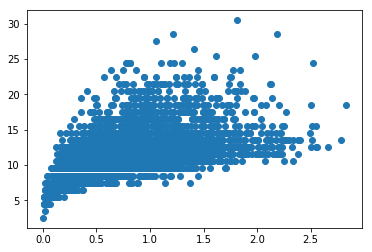

In [35]:
plt.scatter(x = data['Whole weight'],y = data['age'],)


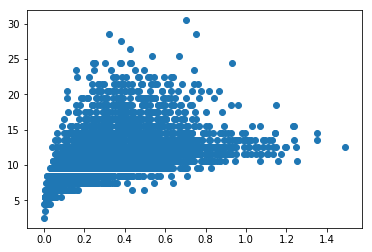

In [36]:
plt.scatter(x = data['Shucked weight'],y = data['age'],)


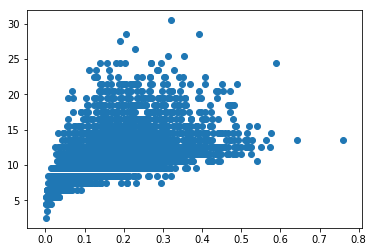

In [37]:
plt.scatter(x = data['Viscera weight'],y = data['age'],)


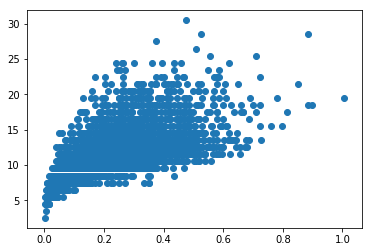

In [38]:
plt.scatter(x = data['Shell weight'],y = data['age'],)

In [39]:
from scipy.stats import zscore
z = np.abs(zscore(data))
data_new = data[(z<3).all(axis=1)]

In [40]:
X_new = data_new.iloc[:,:-1]
y_new = data_new.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=95)

In [42]:
def models(modelName):
    m = modl[modelName]()
    m.fit(X_train, y_train)
    print("Model Name  :",modelName)
    print(m.score(X_test, y_test))
    print(mean_squared_error(y_test, m.predict(X_test)))
    print(r2_score(y_test, m.predict(X_test)))
    print("_________________________________________________")

In [43]:
for key in modl:
    models(key)

Model Name  : LinearRegression
0.5738462228886452
3.6448567118233224
0.5738462228886452
_________________________________________________
Model Name  : Ridge
0.5583307433446554
3.7775592778697833
0.5583307433446554
_________________________________________________
Model Name  : Lasso
-3.23327082063507e-06
8.552941901251206
-3.23327082063507e-06
_________________________________________________
Model Name  : GradientBoostingRegressor
0.5878181599188155
3.5253559325347186
0.5878181599188155
_________________________________________________


#function to check r2_score on all posible values
def someNum(num):
    xtrain,xtest,ytrain,ytest= train_test_split(X_new,y_new,test_size=.20,random_state=num)
    lm1 = LinearRegression()
    lm1.fit(xtrain,ytrain)
    predictn1  = lm1.predict(xtest)
    s =r2_score(ytest,predictn1)
    if(0.57 < s ):
        print("=====> "+str(num))
        print(mean_squared_error(ytest,predictn1))
        print(s)
for a in range(0,101):
    someNum(a)#empSal = pd.DataFrame(data=emp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58fa40d470>,
      dtype=object)

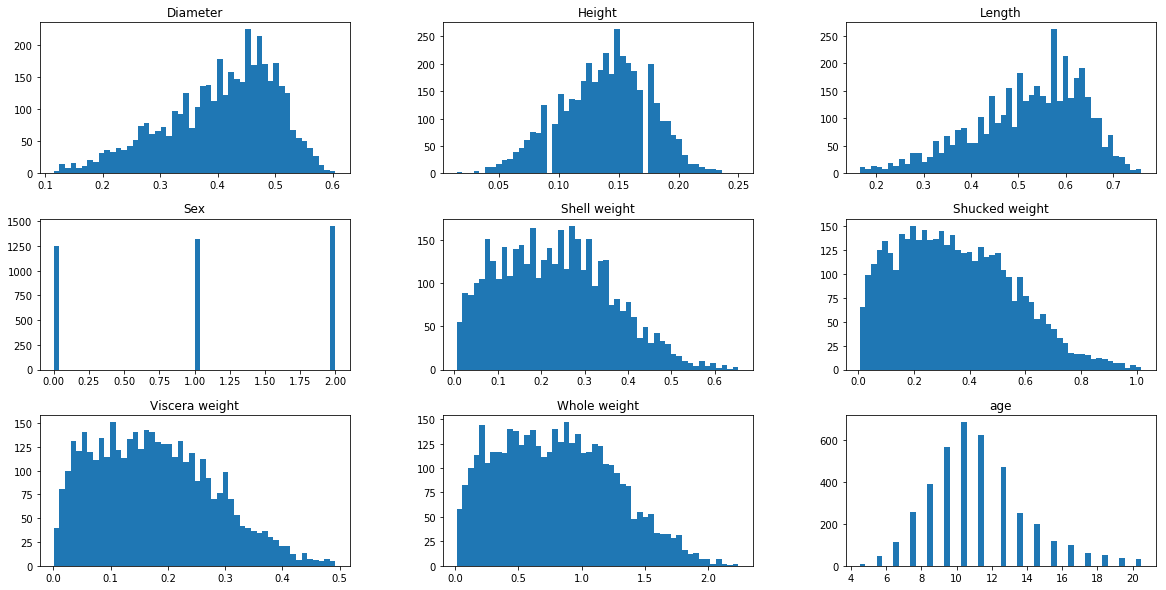

In [47]:
data_new.hist(figsize=(20,10),grid=False,layout=(3,3),bins=50)